<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Feature_Scaling_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/wine_data.csv')

In [ ]:
df.sample(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
104,2,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
129,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
138,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
161,3,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/wine_data.csv',header=None,usecols=[0,1,2])
df

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [ ]:
df.columns=['Class label','Alcohol','Malic acid']


In [ ]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

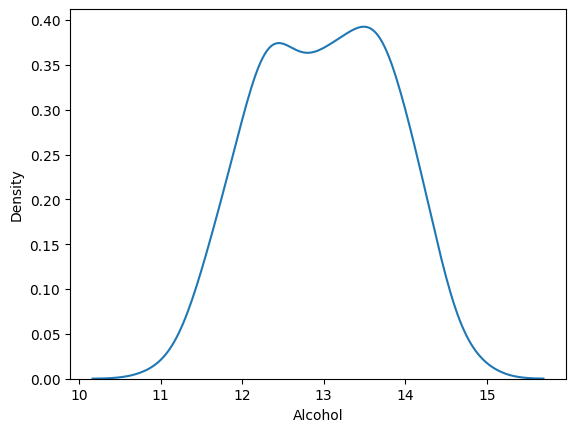

In [ ]:
sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Malic acid', ylabel='Density'>

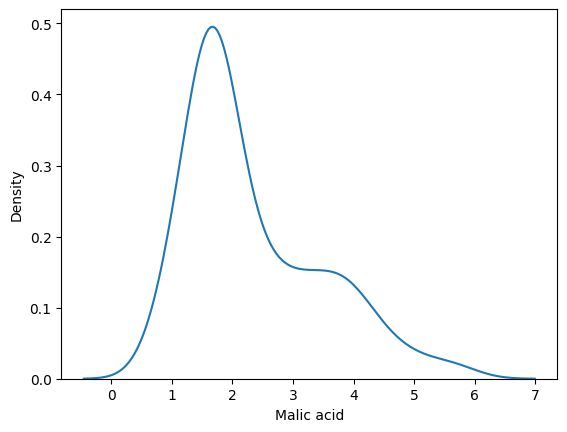

In [ ]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

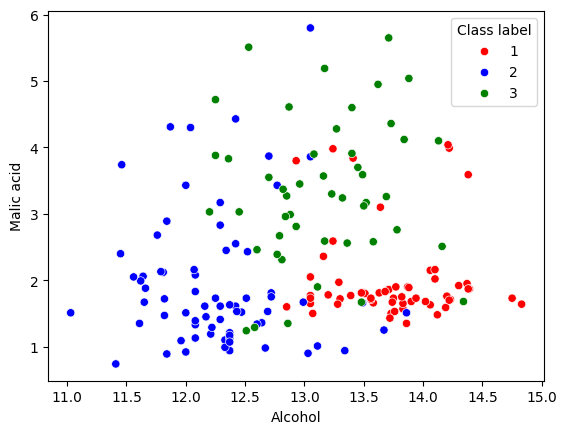

In [ ]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='Alcohol',y='Malic acid',data=df,hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)
x_train.shape,x_train.shape

((124, 2), (124, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [ ]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


In [ ]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


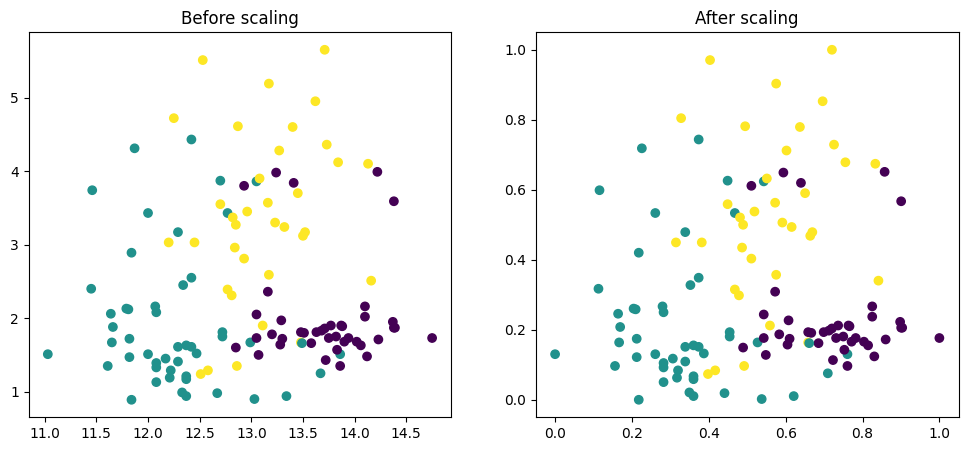

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After scaling')
plt.show()

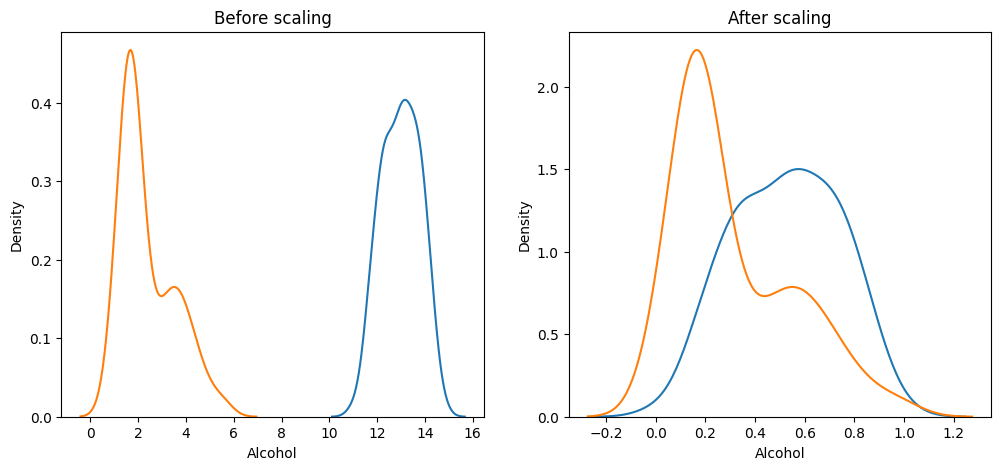

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before  scaling
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
# after scaling
ax2.set_title('After scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()

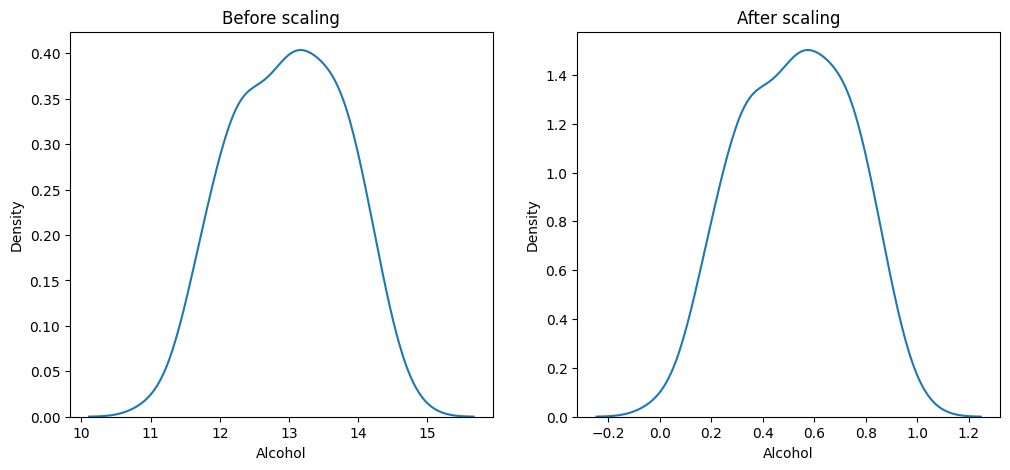

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before  scaling
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
# after scaling
ax2.set_title('After scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
plt.show()

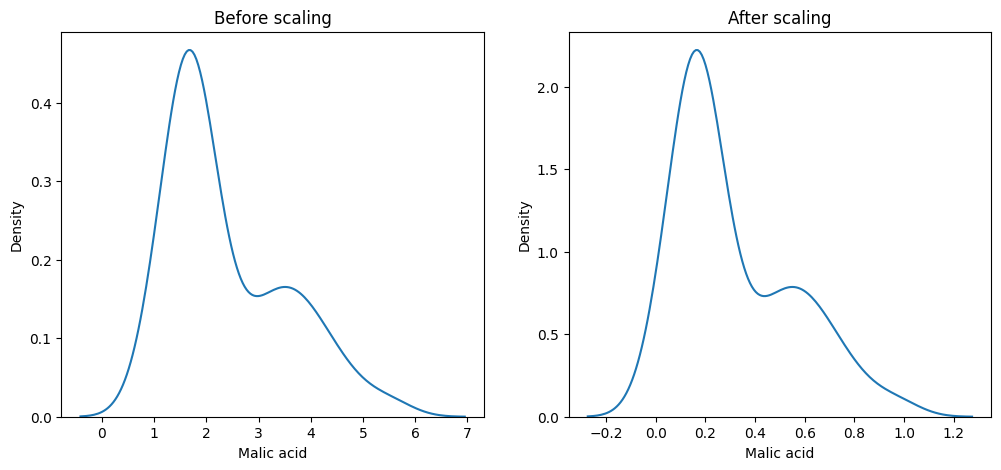

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before  scaling
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Malic acid'],ax=ax1)
# after scaling
ax2.set_title('After scaling')
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()